# 1 - Importando bibliotecas e carregando os dados

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
#Carregando os dados

visits_log_us = pd.read_csv('/datasets/visits_log_us.csv')
orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

In [18]:
#Conhecendo os dados - visits_log_us

visits_log_us.info()
print(visits_log_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  

#### Sobre os dados de visits_log_us 

Observei que os dados das colunas End Ts e Start Ts precisam ser convertidos para o tipo datetime. Além disso, para manter os dados padronizados eu também irei deixar os nomes das colunas em letra minúscula.

In [19]:
#Conhecendo os dados - orders_log_us

orders_log_us.info()
print(orders_log_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382


#### Sobre os dados de orders_log_us

Nesse conjunto de dados, também será necessário converter o tipo de dado da coluna Buy Ts para datetime. Também irei deixar os nomes das colunas em letra minúscula.

In [20]:
#Conhecendo os dados - costs_us

costs_us.info()
print(costs_us.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


#### Sobre os dados de costs_us

Irei converter o tipo dos dados da coluna dt para datetime.

# 2 - Preparando os dados

In [21]:
#Convertendo os tipos dos dados das tabelas 

#visits_log_us
visits_log_us.columns = visits_log_us.columns.str.lower()
visits_log_us['start ts'] = pd.to_datetime(visits_log_us['start ts'])
visits_log_us['end ts'] = pd.to_datetime(visits_log_us['end ts'])


#orders_log_us
orders_log_us.columns = orders_log_us.columns.str.lower()
orders_log_us['buy ts'] = pd.to_datetime(orders_log_us['buy ts'])


#costs_us
costs_us['dt'] = pd.to_datetime(costs_us['dt'])



#Checando o resultado
visits_log_us.info()
orders_log_us.info()
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

# 3 - Análise Exploratória

## a) Produto

    start ts  dau
0 2017-06-01  605
1 2017-06-02  608
2 2017-06-03  445
3 2017-06-04  476
4 2017-06-05  820
    start ts   wau
0 2017-06-05  2767
1 2017-06-12  3730
2 2017-06-19  2932
3 2017-06-26  2944
4 2017-07-03  3092
    start ts    mau
0 2017-06-30  13259
1 2017-07-31  14183
2 2017-08-31  11631
3 2017-09-30  18975
4 2017-10-31  29692


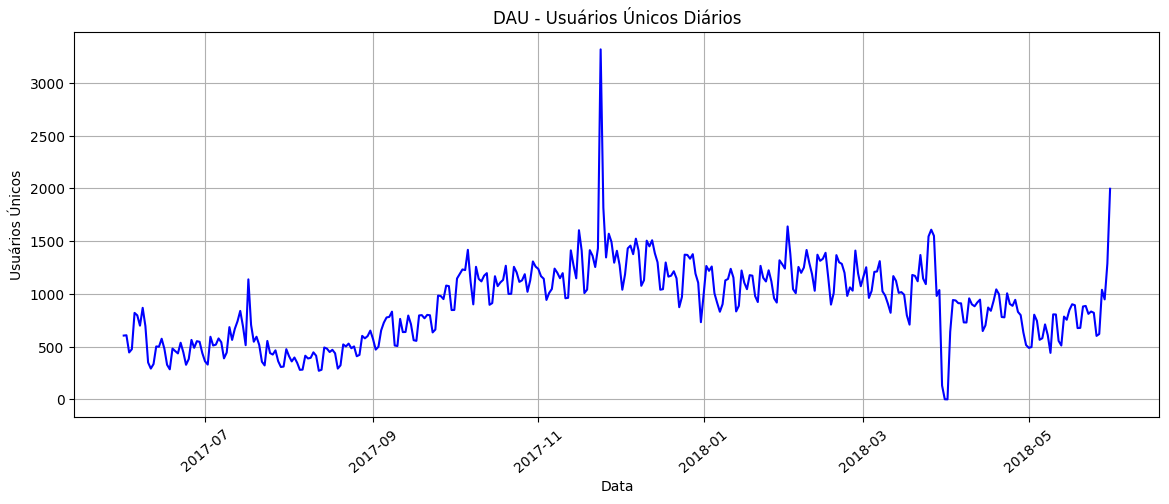

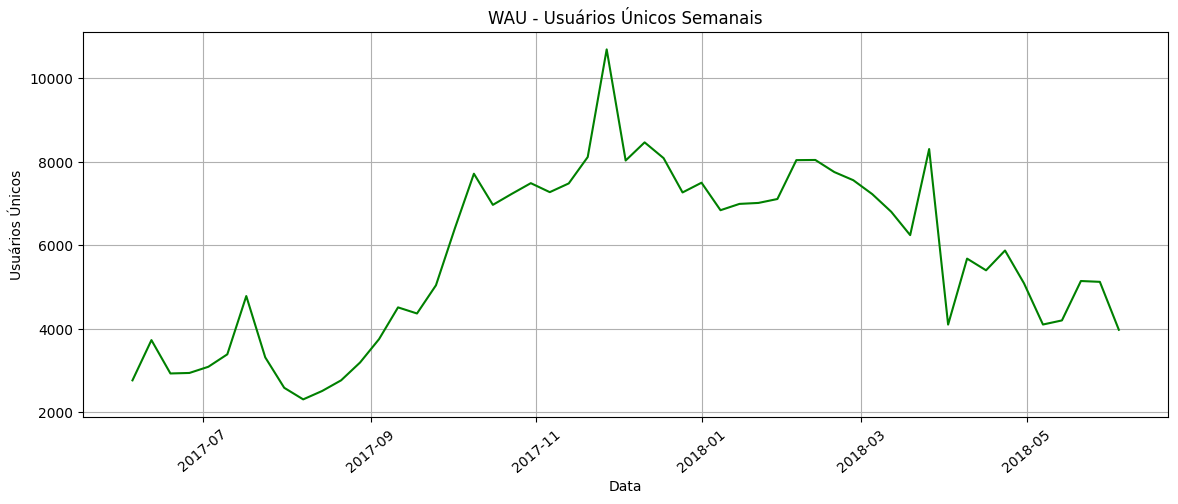

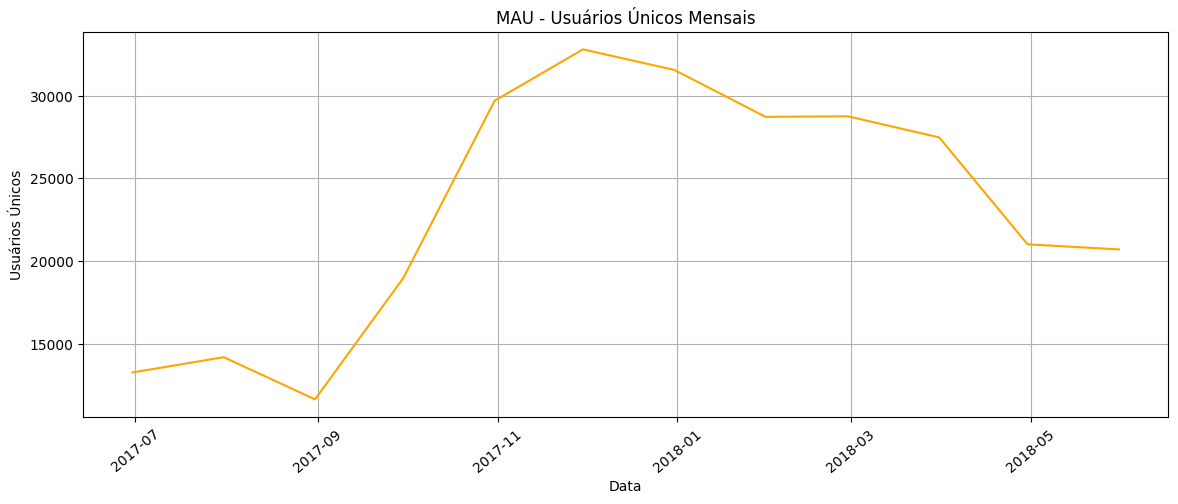

In [22]:
#1 - Quantas pessoas usam o produto por dia, semana e mês

dau = visits_log_us.groupby(pd.Grouper(key='start ts', freq='D'))['uid'].nunique().reset_index(name='dau')
wau = visits_log_us.groupby(pd.Grouper(key='start ts', freq='W-MON'))['uid'].nunique().reset_index(name='wau')
mau = visits_log_us.groupby(pd.Grouper(key='start ts', freq='M'))['uid'].nunique().reset_index(name='mau')

#Checando resultados
print(dau.head())
print(wau.head())
print(mau.head())


#Gráficos
#DAU
plt.figure(figsize=(14,5))
plt.plot(dau['start ts'], dau['dau'], color='blue')
plt.title('DAU - Usuários Únicos Diários')
plt.xlabel('Data')
plt.ylabel('Usuários Únicos')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()

#WAU
plt.figure(figsize=(14,5))
plt.plot(wau['start ts'], wau['wau'], color='green')
plt.title('WAU - Usuários Únicos Semanais')
plt.xlabel('Data')
plt.ylabel('Usuários Únicos')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()

#MAU
plt.figure(figsize=(14,5))
plt.plot(mau['start ts'], mau['mau'], color='orange')
plt.title('MAU - Usuários Únicos Mensais')
plt.xlabel('Data')
plt.ylabel('Usuários Únicos')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()

    start ts  sessions
0 2017-06-01       664
1 2017-06-02       658
2 2017-06-03       477
3 2017-06-04       510
4 2017-06-05       893


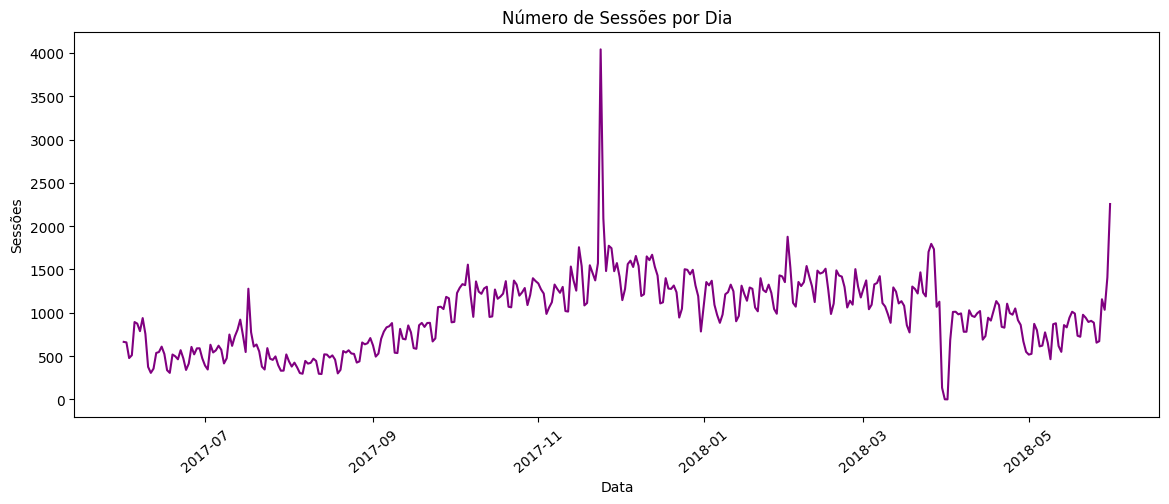

In [23]:
#2 - Quantas sessões ocorrem por dia?

sessions_per_day = visits_log_us.groupby(pd.Grouper(key='start ts', freq='D')).size().reset_index(name='sessions')
print(sessions_per_day.head())


#Gráfico
plt.figure(figsize=(14,5))
plt.plot(sessions_per_day['start ts'], sessions_per_day['sessions'], color='purple')
plt.title('Número de Sessões por Dia')
plt.xlabel('Data')
plt.ylabel('Sessões')
plt.xticks(rotation=40)
plt.show()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_length_min, dtype: float64


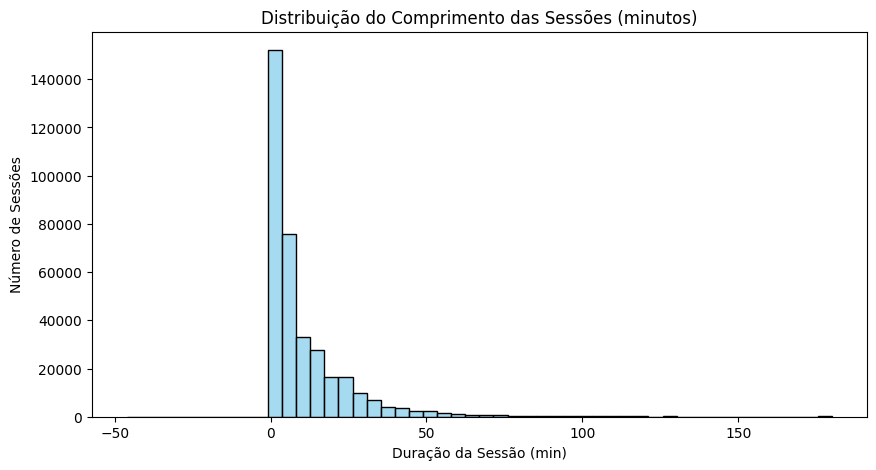

In [24]:
#3 - Que comprimento tem cada sessão?

visits_log_us['session_length_s'] = (visits_log_us['end ts'] - visits_log_us['start ts']).dt.total_seconds()
visits_log_us['session_length_min'] = visits_log_us['session_length_s'] / 60

print(visits_log_us['session_length_min'].describe())


#Gráfico
plt.figure(figsize=(10,5))
sns.histplot(visits_log_us['session_length_min'].clip(upper=180), bins=50, color='skyblue')
plt.title('Distribuição do Comprimento das Sessões (minutos)')
plt.xlabel('Duração da Sessão (min)')
plt.ylabel('Número de Sessões')
plt.show()

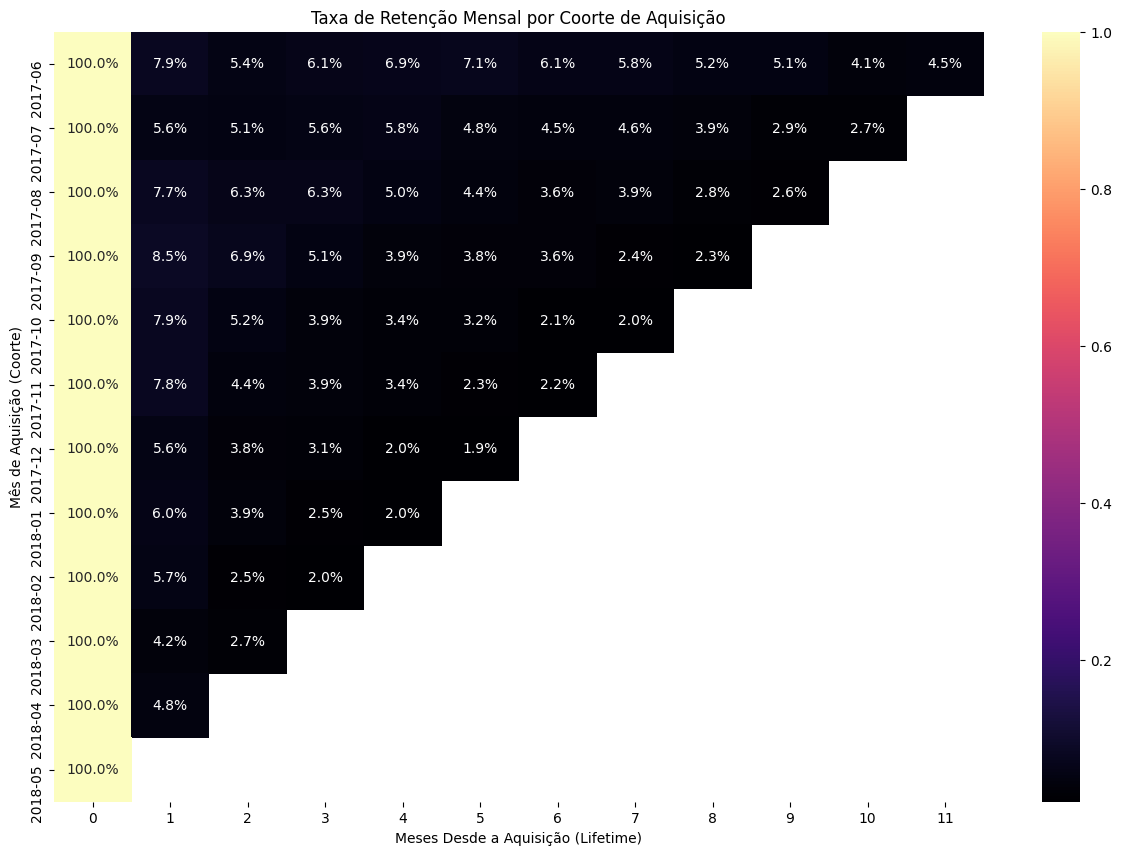

In [39]:
#4 - Com que frequência os usuários voltam?


visits_log_us['acquisition_month'] = visits_log_us.groupby('uid')['start ts'].transform('min').dt.to_period('M')

#Mês da sessão
visits_log_us['session_month'] = visits_log_us['start ts'].dt.to_period('M')

#Calculando a "idade" do usuário em meses desde a aquisição
visits_log_us['cohort_lifetime'] = (visits_log_us['session_month'] - visits_log_us['acquisition_month']).apply(lambda x: x.n)

#Criando a tabela de coortes
cohorts = visits_log_us.groupby(['acquisition_month', 'cohort_lifetime'])['uid'].nunique().reset_index()
cohorts_pivot = cohorts.pivot_table(index='acquisition_month', columns='cohort_lifetime', values='uid')

#Calculando a retenção percentual
cohort_size = cohorts_pivot.iloc[:, 0]  # tamanho da coorte (primeiro mês)
retention_matrix = cohorts_pivot.divide(cohort_size, axis=0)

#Plotando o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.1%', cmap='magma')
plt.title('Taxa de Retenção Mensal por Coorte de Aquisição')
plt.xlabel('Meses Desde a Aquisição (Lifetime)')
plt.ylabel('Mês de Aquisição (Coorte)')
plt.show()

#### Conclusão - Produto

Observando os gráficos sobre como os usuários usam o produto, é possivel observar que:
- O número de usuários que acessam diariamente é muito baixo
- Há um pico de acessos no mês de dezembro, provavelmente por conta das festas de final de ano + campanhas sazonais
- A maioria das sessões tem duração muito curta, o que pode indicar que talvez há usuários acessando sem querer, usuários que não conhecem o produto (pode faltar onboarding) ou não se engajando na plataforma
- São poucos os usuários que ficam mais de 50 dias sem acessar, grande parte deles acessam pelo menos 1 vez ao mês

## b) Vendas

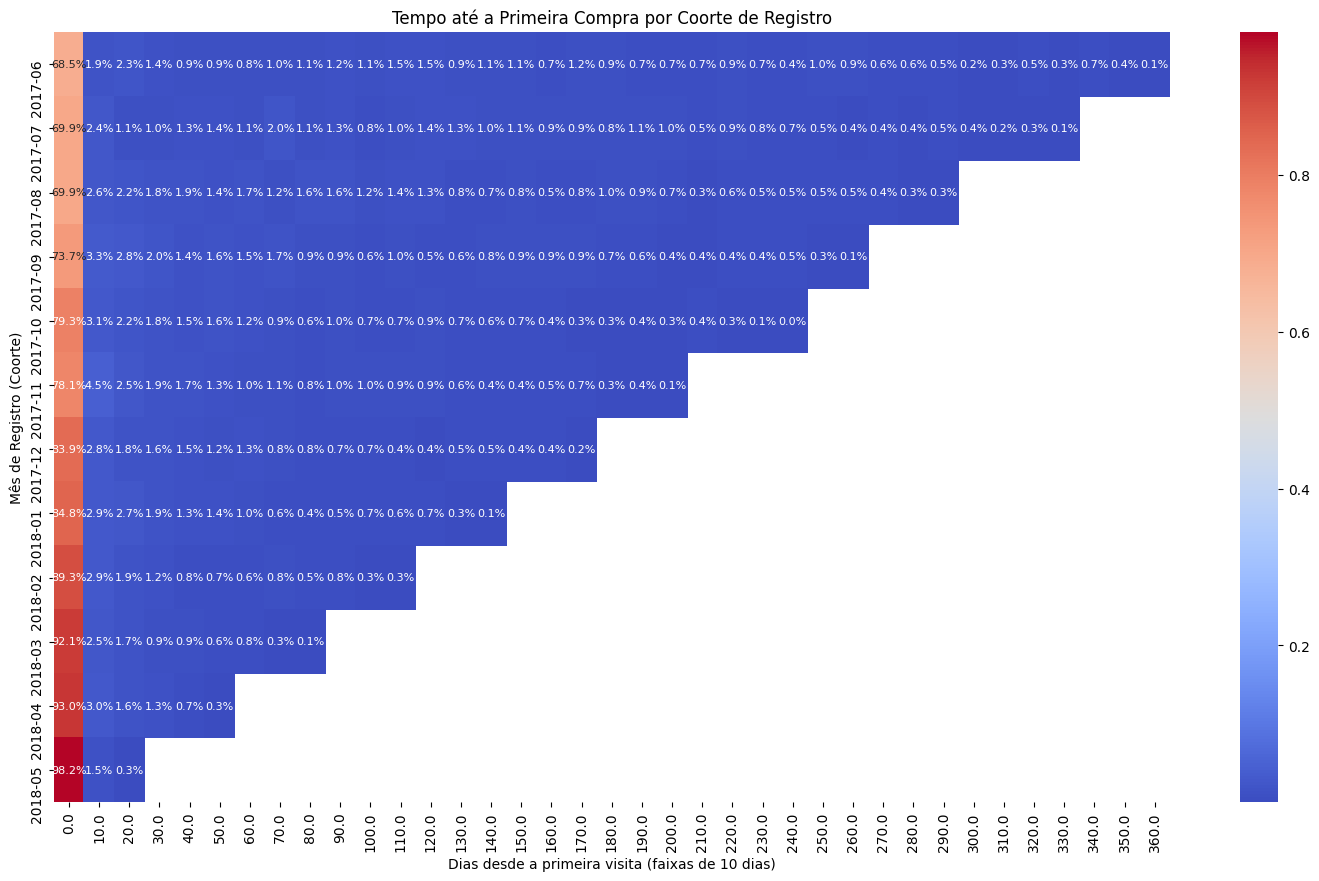

In [27]:
#Quando as pessoas começam a comprar?

#Data da primeira visita
first_visit = visits_log_us.groupby('uid')['start ts'].min().reset_index()
first_visit.rename(columns={'start ts':'first_visit_ts'}, inplace=True)

#Data da primeira compra
first_order = orders_log_us.groupby('uid')['buy ts'].min().reset_index()
first_order.rename(columns={'buy ts':'first_purchase_date'}, inplace=True)

#Unindo visitas e compras
conversion_data = first_visit.merge(first_order, on='uid', how='left')

#Calculando dias até a primeira compra
conversion_data['time_to_conversion'] = (conversion_data['first_purchase_date'] - conversion_data['first_visit_ts']).dt.days



#Criando uma cópia para evitar warnings
conversion_data_copy = conversion_data.copy()

#Criando mês de registro (coorte)
conversion_data_copy['registration_month'] = conversion_data_copy['first_visit_ts'].dt.to_period('M')

#Agrupando em faixas de 10 dias
conversion_data_copy['days_bin'] = (conversion_data_copy['time_to_conversion'] // 10) * 10

#Criando tabela de coorte
cohort_table = conversion_data_copy.pivot_table(
    index='registration_month',
    columns='days_bin',
    values='uid',
    aggfunc='count'
)

#Normalizando por tamanho da coorte
cohort_size = cohort_table.sum(axis=1)
retention_matrix = cohort_table.divide(cohort_size, axis=0)

#Plotando o heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.1%', cmap='coolwarm', annot_kws={"size":8})
plt.title('Tempo até a Primeira Compra por Coorte de Registro')
plt.xlabel('Dias desde a primeira visita (faixas de 10 dias)')
plt.ylabel('Mês de Registro (Coorte)')
plt.show()

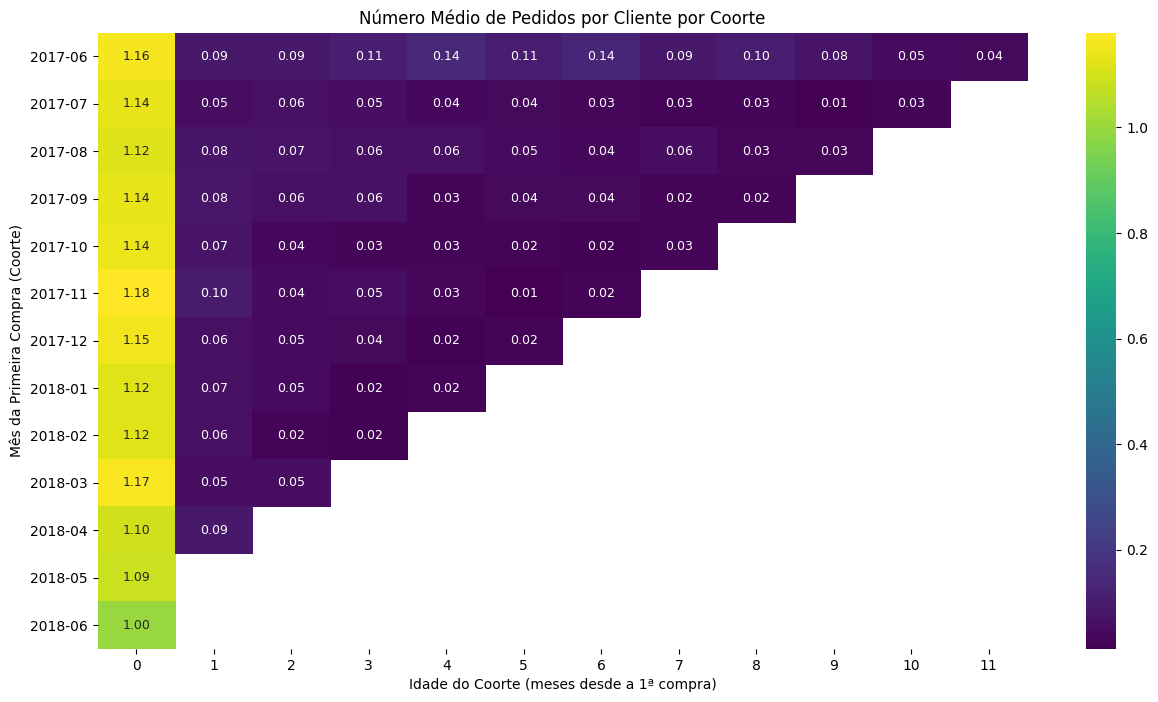

In [29]:
#Quantos pedidos os clientes fazem durante um determinado período de tempo?


#Encontrando o mês da primeira compra de cada cliente (coorte)
first_order_month = orders_log_us.groupby('uid')['buy ts'].min().dt.to_period('M')
first_order_month.name = 'acquisition_month'

#Juntando a informação do coorte de volta ao dataframe de pedidos
orders_with_cohort = orders_log_us.join(first_order_month, on='uid')

#Mês de cada pedido
orders_with_cohort['order_month'] = orders_with_cohort['buy ts'].dt.to_period('M')

#Calculando 'idade' do coorte para cada pedido
orders_with_cohort['cohort_age'] = (orders_with_cohort['order_month'] - orders_with_cohort['acquisition_month']).apply(lambda x: x.n)

#Criando pivot table com número total de pedidos por coorte e por idade
orders_by_cohort = orders_with_cohort.pivot_table(
    index='acquisition_month',
    columns='cohort_age',
    values='uid',
    aggfunc='count'
)

#Tamanho de cada coorte (clientes únicos que compraram pela primeira vez em cada mês)
cohort_size = orders_with_cohort.groupby('acquisition_month')['uid'].nunique()

#Número médio de pedidos por cliente em cada faixa de idade do coorte
avg_orders_pivot = orders_by_cohort.divide(cohort_size, axis=0)

#Plotando o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(avg_orders_pivot, annot=True, fmt='.2f', cmap='viridis', annot_kws={"size":9})
plt.title('Número Médio de Pedidos por Cliente por Coorte')
plt.xlabel("Idade do Coorte (meses desde a 1ª compra)")
plt.ylabel("Mês da Primeira Compra (Coorte)")
plt.show()

Valor médio por pedido (Ticket Médio): $5.00


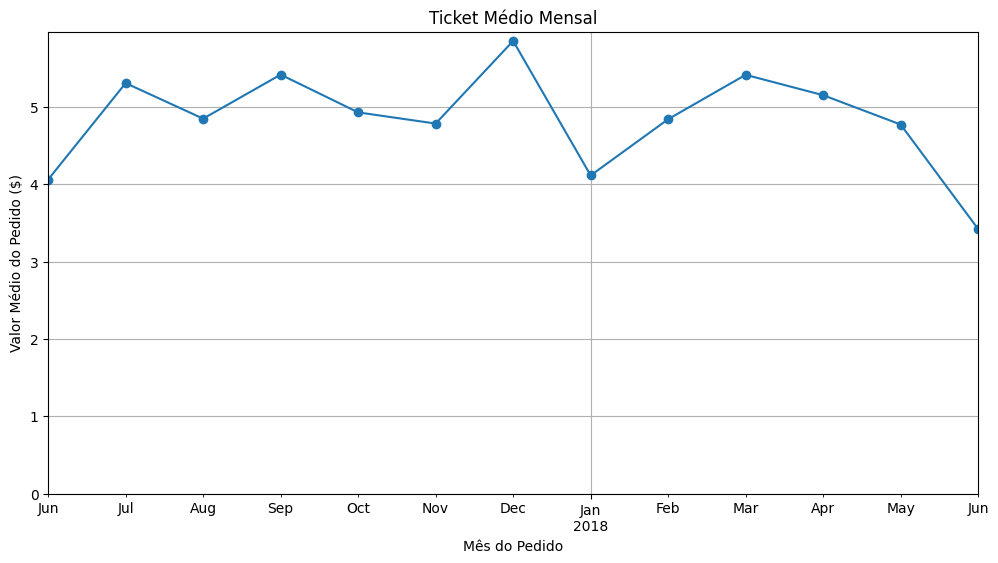

In [31]:
#Qual é o volume médio de uma compra?

#Ticket médio
avg_order_value = orders_log_us['revenue'].mean()
print(f'Valor médio por pedido (Ticket Médio): ${avg_order_value:.2f}')

#Ticket médio mensal
orders_log_us['order_month'] = orders_log_us['buy ts'].dt.to_period('M')
monthly_avg_check = orders_log_us.groupby('order_month')['revenue'].mean()

#Plotando gráfico
monthly_avg_check.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Ticket Médio Mensal')
plt.xlabel('Mês do Pedido')
plt.ylabel('Valor Médio do Pedido ($)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

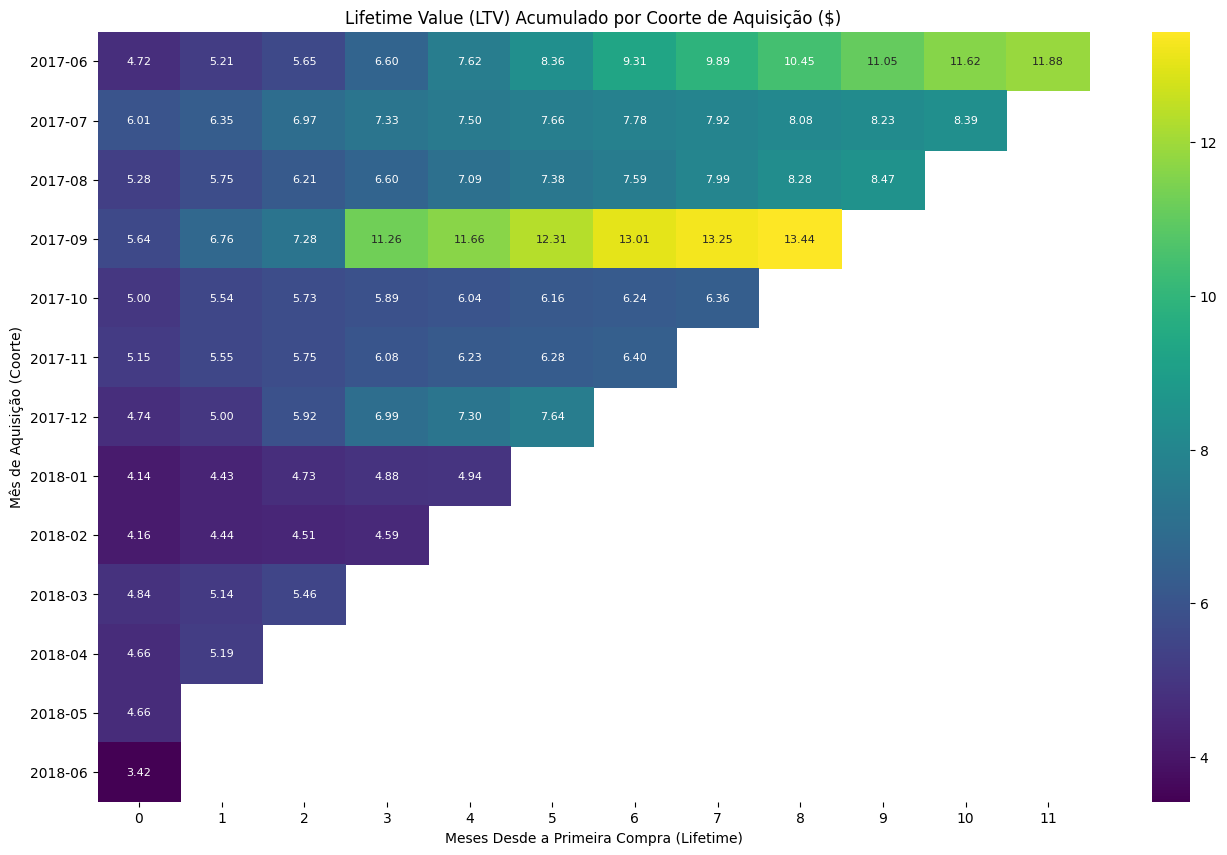

In [33]:
#Quanto dinheiro eles trazem para a empresa (LTV)?


#Definindo o mês de aquisição
orders_log_us['acquisition_month'] = orders_log_us.groupby('uid')['buy ts'].transform('min').dt.to_period('M')

#Mês de cada pedido
orders_log_us['order_month'] = orders_log_us['buy ts'].dt.to_period('M')

#Calculando a idade do coorte para cada pedido
orders_log_us['cohort_lifetime'] = (orders_log_us['order_month'] - orders_log_us['acquisition_month']).apply(lambda x: x.n)

#Calculando receita por coorte e por idade
cohorts_revenue = orders_log_us.groupby(['acquisition_month', 'cohort_lifetime'])['revenue'].sum().reset_index()

#Obtendo o tamanho de cada coorte
cohort_sizes = orders_log_us.groupby('acquisition_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['acquisition_month', 'n_buyers']

#Unindo os dados de receita e tamanho do coorte
cohorts_data = pd.merge(cohorts_revenue, cohort_sizes, on='acquisition_month')

#Calculando LTV por coorte e idade
cohorts_data['ltv'] = cohorts_data['revenue'] / cohorts_data['n_buyers']

#Criando tabela pivot para o LTV acumulado
ltv_pivot = cohorts_data.pivot_table(
    index='acquisition_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

#Plotando o heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', cmap='viridis', annot_kws={"size":8})
plt.yticks(rotation=0)
plt.title('Lifetime Value (LTV) Acumulado por Coorte de Aquisição ($)')
plt.xlabel('Meses Desde a Primeira Compra (Lifetime)')
plt.ylabel('Mês de Aquisição (Coorte)')
plt.show()


#### Conclusão - Vendas

Com base nos gráficos, é possível dizer que:
- A grande maioria das pessoas não demoram mais que 10 dias para realizar a primeira compra
- A grande maioria dos usuários fazem menos que 5 pedidos em um determinado período de tempo
- O ticket médio é de 5 dólares
- A maioria dos clientes trazem menos que 10.000 dólares de dinheiro ao longo do tempo de vida como cliente


## c) Marketing

Custo total de marketing: $329131.62
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


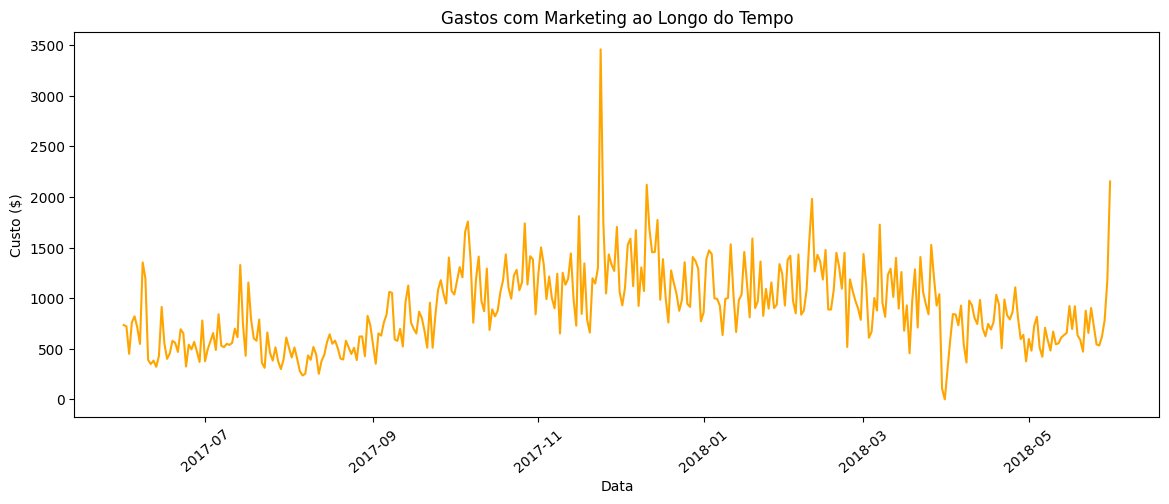

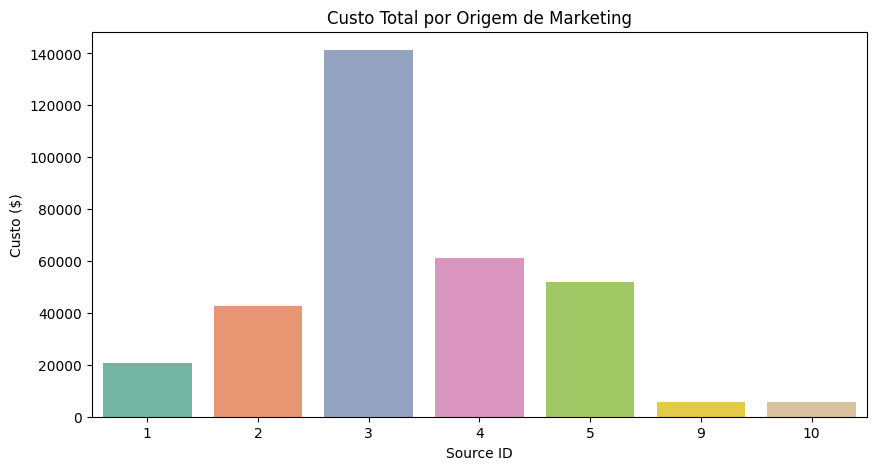

In [35]:
#Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

#Total gasto
total_cost = costs_us['costs'].sum()
print(f'Custo total de marketing: ${total_cost:.2f}')

#Gasto por origem
cost_by_source = costs_us.groupby('source_id')['costs'].sum().reset_index()
print(cost_by_source)

#Gasto ao longo do tempo (soma diária)
daily_costs = costs_us.groupby('dt')['costs'].sum().reset_index()

#Gráfico de gastos ao longo do tempo
plt.figure(figsize=(14,5))
plt.plot(daily_costs['dt'], daily_costs['costs'], color='orange')
plt.title('Gastos com Marketing ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Custo ($)')
plt.xticks(rotation=40)
plt.show()

#Gráfico de gastos por origem
plt.figure(figsize=(10,5))
sns.barplot(data=cost_by_source, x='source_id', y='costs', palette='Set2')
plt.title('Custo Total por Origem de Marketing')
plt.xlabel('Source ID')
plt.ylabel('Custo ($)')
plt.show()

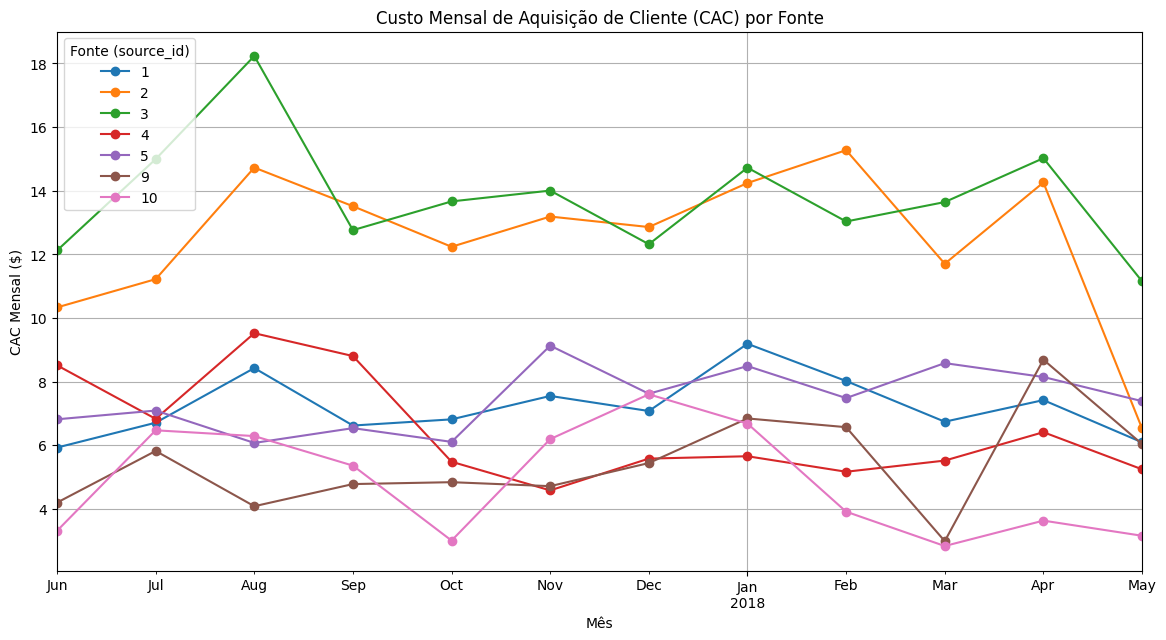

In [36]:
#Quanto custou a aquisição de clientes para cada origem?


cost_by_source_month = costs_us.copy()
cost_by_source_month['month'] = cost_by_source_month['dt'].dt.to_period('M')

#Encontrando a primeira visita de cada usuário para obter a fonte
first_visits = visits_log_us.sort_values('start ts').drop_duplicates('uid')[['uid', 'source id']]

#Encontrando a primeira compra de cada cliente
first_orders = orders_log_us.sort_values('buy ts').drop_duplicates('uid')[['uid', 'buy ts']]
first_orders['acquisition_month'] = first_orders['buy ts'].dt.to_period('M')

#Unindo informações de primeira compra e fonte
buyers = pd.merge(first_orders, first_visits, on='uid')

#Número de clientes adquiridos por mês e fonte
buyers_by_month_source = buyers.groupby(['acquisition_month', 'source id'])['uid'].nunique().reset_index()
buyers_by_month_source.columns = ['month', 'source_id', 'n_buyers']

#Custos mensais por fonte
costs_by_month_source = cost_by_source_month.groupby(['month', 'source_id'])['costs'].sum().reset_index()

#Unindo custos e número de compradores
cac_monthly_data = pd.merge(costs_by_month_source, buyers_by_month_source, on=['month', 'source_id'])

#Calculando CAC mensal
cac_monthly_data = cac_monthly_data[cac_monthly_data['n_buyers'] > 0]
cac_monthly_data['cac'] = cac_monthly_data['costs'] / cac_monthly_data['n_buyers']

#Pivot table para plotagem
cac_pivot = cac_monthly_data.pivot_table(
    index='month',
    columns='source_id',
    values='cac'
)

#Gráfico
cac_pivot.plot(figsize=(14, 7), style='-o')
plt.title('Custo Mensal de Aquisição de Cliente (CAC) por Fonte')
plt.xlabel('Mês')
plt.ylabel('CAC Mensal ($)')
plt.legend(title='Fonte (source_id)')
plt.grid(True)
plt.show()

   source id   revenue      costs       roi
0          1  31090.55   20833.27  0.492351
1          2  46923.61   42806.04  0.096191
2          3  54511.24  141321.63 -0.614275
3          4  56696.83   61073.60 -0.071664
4          5  52624.02   51757.10  0.016750
5          9   5759.40    5517.49  0.043844
6         10   4450.33    5822.49 -0.235665


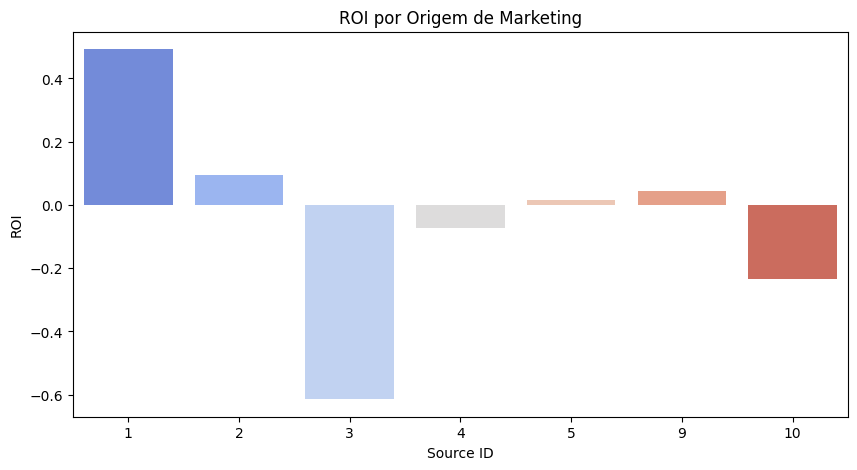

In [38]:
#Os investimentos valeram a pena? (ROI)


#Selecionando a primeira compra com a origem do primeiro acesso
first_orders = orders_log_us.merge(first_visits[['uid', 'source id']], on='uid', how='left')
revenue_by_source = first_orders.groupby('source id')['revenue'].sum().reset_index()

#Juntando com os custos
roi = revenue_by_source.merge(cost_by_source, left_on='source id', right_on='source_id')
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

print(roi[['source id', 'revenue', 'costs', 'roi']])

#Gráfico
plt.figure(figsize=(10,5))
sns.barplot(data=roi, x='source id', y='roi', palette='coolwarm')
plt.title('ROI por Origem de Marketing')
plt.xlabel('Source ID')
plt.ylabel('ROI')
plt.show()

#### Conclusão - Marketing

- Os custos com marketing no mês de dezembro são altos, o que pode justificar o aumento nos acessos nesse período
- O maior custo do departamento de marketing é com a origem de ID 3
- Apesar do custo com a origem 3 ser maior, o canal de origem 4 trouxe quase o mesmo número de clientes com um investimento muito menor
- Os canais com ROI negativo são 3, 4 e 10. Ou seja, apesar de os outros canais trazerem menos usuários para a plataforma, eles acabam sendo o mais rentáveis pois o custo é baixo.

# 4 - Conclusão Final


A análise de Produto, Vendas e Marketing mostra que o engajamento diário dos usuários é baixo, com picos em dezembro, e a maioria das sessões é curta, indicando necessidade de melhorar o onboarding. A maioria dos usuários realiza a primeira compra em até 10 dias, faz menos de cinco pedidos por período e gera um ticket médio de 5 dólares, com LTV geralmente abaixo de 10.000 dólares.

No Marketing, embora a origem 3 tenha maior investimento, canais como a origem 4 trazem quase o mesmo número de clientes com custo menor e ROI positivo, evidenciando que nem sempre os canais mais caros são os mais eficientes. Recomenda-se priorizar canais com ROI positivo e CAC mais baixo (ID 1 é o com melhor ROI, seguido por  , melhorar o onboarding e incentivar compras repetidas para aumentar engajamento e receita.